#### <span style="color:blue">*JUST RUN CELL*</span>

In [1]:
import os 
os.chdir(os.path.join("/home/datawork-osmose/",'osmoseNotebooks_v0','source'))
from launcher_AI import main, list_datasets,list_folder_audio, build_image_folder

#### <span style="color:red">*FILL & RUN CELLS*</span>

- ``dataset_ID`` is the name of the dataset to be processed

In [2]:
list_datasets()

Available datasets:
  - CampagneAstrolabe2022_SelectionPourBetaTest
  - DDU2018
  - Hadocc
  - MAHY01
  - MPSU_ForestouHuella
  - SPMAuralA_2010
  - SPMAuralA_2011
  - SPMAuralA_2011_SelectionPourAnnotations2
  - SPMAuralA_2011_SelectionPourAnnotations2_copy
  - argoLOV
  - azoresIfremer
  - fromveur256000
  - fromveur256000_SelectionPourAnnotations
  - gliderSPAms
  - gliderSPAms_PAMGuard
  - gliderWHOI
  - gliderWalterShoals
  - ohasisbio2015wker


In [3]:
dataset_ID='SPMAuralA_2011_SelectionPourAnnotations2_copy'

## Configure your AI model
<span style="color:red">*FILL & RUN CELL*</span>

- `task_ID` : it should refer to one of the following AI tasks currently addressed in OSmOSE:
  - task 1 : presence / absence of biological sound events in fixed-duration sound clips / weak labels / 2 classes ;
  - task 2 : biological sound event detection 
  
- `vector_classlabels` : provide the path of your ground truth of annotations 

In [4]:
path_input_features = '/home/datawork-osmose/dataset/SPMAuralA_2011_SelectionPourAnnotations2/analysis/spectrograms/10_32768/nfft=2048 winsize=1024 overlap=85 cvr=-20:0'

task_ID = 1
model_name = 'simpleCNNtensorflow'
vector_classlabels = '/home/datawork-osmose/dataset/SPMAuralA_2011_SelectionPourAnnotations2/results/annotations/task1_annotationAstrolabeJulie.csv'

# parameters of evaluation protocol
training_percent = 60
test_percent = 20

### Build image folder
<span style="color:blue">*JUST RUN CELL IF NEEDED*</span> 
This cell will build a folder of images with a class-based structure based on the file `vector_classlabels`

```
path_AI_dataset/
...class_a/
......a_image_1.png
......a_image_2.png
...class_b/
......b_image_1.png
......b_image_2.png
```

Please use the variable `path_AI_dataset` to further refer to this directory.

In [5]:
build_image_folder(dataset_ID,task_ID,path_input_features,vector_classlabels)

## Launch your AI model
<span style="color:blue">*JUST RUN CELL*</span>

Found 3240 files belonging to 2 classes.
Using 1944 files for training.


2022-06-16 12:23:50.744835: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-16 12:23:51.434123: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30877 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:12:00.0, compute capability: 7.0


Found 3240 files belonging to 2 classes.
Using 648 files for validation.


2022-06-16 12:24:01.886390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 23 of 1000
2022-06-16 12:24:01.902885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2022-06-16 12:24:02.897612: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


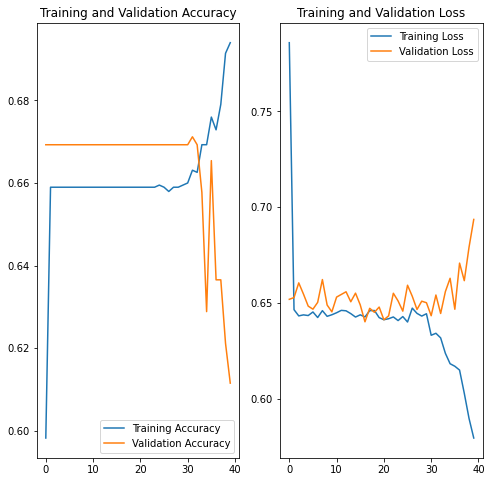

2/2 [==============================] - 3s 332ms/step - loss: 0.6997 - accuracy: 0.6328
Test accuracy : 0.6328125


In [6]:
main(dataset_ID,path_input_features,model_name,task_ID,vector_classlabels,test_percent,training_percent)